In [93]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np


df = pd.read_csv("/content/drive/MyDrive/Shark Tank India.csv")
df.select_dtypes(include=['object']).columns



Index(['Startup Name', 'Industry', 'Business Description', 'Company Website',
       'Pitchers Average Age', 'Pitchers City', 'Pitchers State', 'Cash Burn',
       'Has Patents', 'Bootstrapped', 'Deal Has Conditions',
       'Invested Guest Name', 'All Guest Names'],
      dtype='object')

In [94]:
df=df[['Startup Name', 'Industry', 'Business Description', 'Company Website',
       'Number of Presenters', 'Male Presenters', 'Female Presenters',
       'Transgender Presenters', 'Couple Presenters', 'Pitchers Average Age',
       'Pitchers City', 'Pitchers State', 'Yearly Revenue', 'Monthly Sales',
       'Gross Margin', 'Net Margin', 'EBITDA', 'Cash Burn', 'SKUs',
       'Has Patents', 'Bootstrapped', 'Unnamed: 22', 'Original Ask Amount',
       'Original Offered Equity', 'Valuation Requested', 'Received Offer',
       'Accepted Offer', 'Total Deal Amount', 'Total Deal Equity',
       'Total Deal Debt', 'Debt Interest', 'Deal Valuation',
       'Number of Sharks in Deal', 'Deal Has Conditions', 'Royalty Percentage',
       'Royalty Recouped Amount', 'Advisory Shares Equity']]

In [95]:
df.select_dtypes(include=['object']).columns

Index(['Startup Name', 'Industry', 'Business Description', 'Company Website',
       'Pitchers Average Age', 'Pitchers City', 'Pitchers State', 'Cash Burn',
       'Has Patents', 'Bootstrapped', 'Deal Has Conditions'],
      dtype='object')

In [96]:
df.drop(axis=1,columns=['Startup Name', 'Industry', 'Business Description', 'Company Website','Pitchers City', 'Pitchers State', 'Pitchers Average Age','Total Deal Equity','Total Deal Amount','Number of Sharks in Deal','Total Deal Debt','Deal Valuation','Debt Interest','Deal Has Conditions','Royalty Percentage','Royalty Recouped Amount' ],inplace=True)

In [97]:
df.select_dtypes(include=['object']).columns

Index(['Cash Burn', 'Has Patents', 'Bootstrapped'], dtype='object')

In [98]:
df["Cash Burn"].fillna(0, inplace=True)
df["Has Patents"].fillna(0, inplace=True)
df["Bootstrapped"].fillna(0, inplace=True)


<ipython-input-98-acb64279a3b1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Cash Burn"].fillna(0, inplace=True)
<ipython-input-98-acb64279a3b1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.met

In [99]:
df["Cash Burn"] = df["Cash Burn"].replace({"yes": 1})
df["Has Patents"] = df["Has Patents"].replace({"yes": 1})
df["Bootstrapped"] = df["Bootstrapped"].replace({"yes": 1,"funded" :0})


<ipython-input-99-e393688d3348>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Cash Burn"] = df["Cash Burn"].replace({"yes": 1})
<ipython-input-99-e393688d3348>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Has Patents"] = df["Has Patents"].replace({"yes": 1})
<ipython-input-99-e393688d3348>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.s

In [100]:
df.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [101]:
df.to_csv("shark_tank_classification_data.csv", index=False)

In [102]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
#final model part
df = df.drop(columns=["Unnamed: 22"])

df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

# categorical_cols = ["Industry", "Pitchers City", "Pitchers State"]
# df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


df["ROI"] = df["Net Margin"] / (df["Gross Margin"] + 1e-9)
df["Equity per Valuation"] = df["Original Offered Equity"] / (df["Valuation Requested"] + 1e-9)

# Define Features (X) and Target Variable (y)
X = df.drop(columns=["Received Offer", "Accepted Offer"])  # Features
y = df["Received Offer"]  # Target variable

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)


RandomForestClassifier(random_state=42)

In [104]:
# Get feature importances
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_*100
})

# Sort by importance
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Display Top Features
print(feature_importances.head(20))

                    Feature  Importance
19     Equity per Valuation   11.949187
5            Yearly Revenue   11.856890
6             Monthly Sales   10.961004
14      Original Ask Amount   10.574945
16      Valuation Requested   10.401926
15  Original Offered Equity    9.158417
18                      ROI    6.339691
0      Number of Presenters    5.483628
1           Male Presenters    4.589303
7              Gross Margin    3.999830
8                Net Margin    2.676431
2         Female Presenters    2.245705
11                     SKUs    2.154391
4         Couple Presenters    2.107048
10                Cash Burn    1.844396
12              Has Patents    1.708041
9                    EBITDA    1.388407
13             Bootstrapped    0.504905
17   Advisory Shares Equity    0.055857
3    Transgender Presenters    0.000000


<ipython-input-49-9c312c7a24e4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances["Importance"][:15], y=feature_importances["Feature"][:15], palette="viridis")


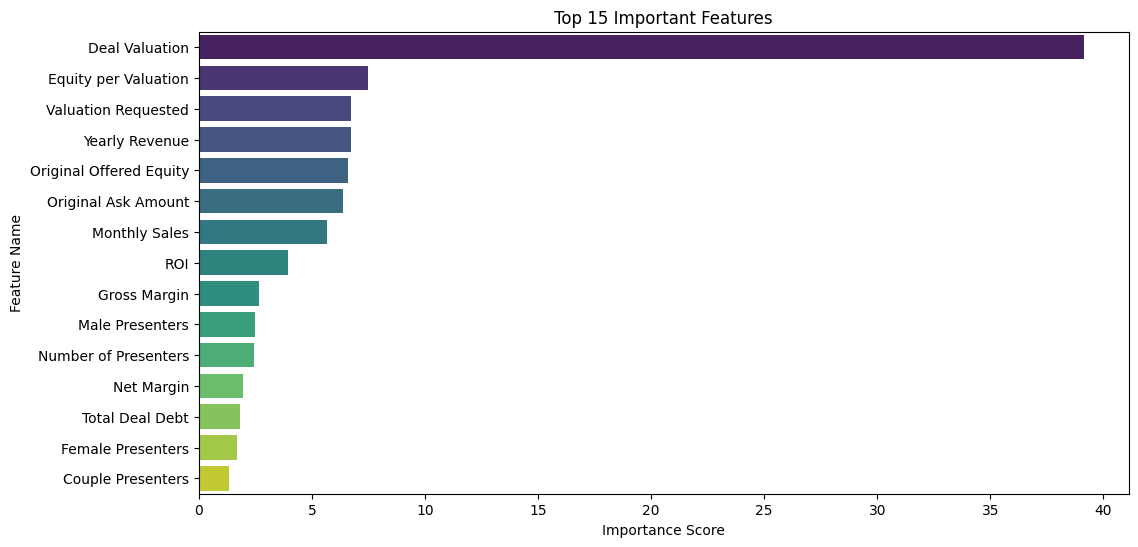

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances["Importance"][:15], y=feature_importances["Feature"][:15], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.title("Top 15 Important Features")
plt.show()


In [105]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Select the top 15 most important features
top_features = feature_importances["Feature"][:15].values

# Create a new dataset with only important features
X_selected = X[top_features]

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Train the model with selected features
rf_model_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_selected.fit(X_train, y_train)





RandomForestClassifier(random_state=42)

In [106]:
top_features = feature_importances["Feature"][:20]
top_features

,Feature
19,Equity per Valuation
5,Yearly Revenue
6,Monthly Sales
14,Original Ask Amount
16,Valuation Requested
15,Original Offered Equity
18,ROI
0,Number of Presenters
1,Male Presenters
7,Gross Margin


In [107]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = rf_model_selected.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6756756756756757
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.14      0.22        35
           1       0.70      0.92      0.80        76

    accuracy                           0.68       111
   macro avg       0.58      0.53      0.51       111
weighted avg       0.62      0.68      0.61       111



In [108]:
# with top 20 features
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Select the top 15 most important features
top_features = feature_importances["Feature"][:20].values

# Create a new dataset with only important features
X_selected = X[top_features]

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Train the model with selected features
rf_model_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_selected.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [109]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = rf_model_selected.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6846846846846847
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.20      0.29        35
           1       0.71      0.91      0.80        76

    accuracy                           0.68       111
   macro avg       0.61      0.55      0.54       111
weighted avg       0.64      0.68      0.64       111



In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
param_dist = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"],
    "bootstrap": [True, False]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Use RandomizedSearchCV for faster tuning
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,  # Number of different combinations to try
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1,  # Use all CPU cores
    scoring="accuracy"
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best Parameters
print("Best Parameters:", random_search.best_params_)

# Train with best parameters
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report
print("Improved Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Improved Accuracy: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.03      0.05        35
           1       0.68      0.96      0.80        76

    accuracy                           0.67       111
   macro avg       0.47      0.49      0.42       111
weighted avg       0.55      0.67      0.56       111



In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define parameter grid (based on RandomizedSearchCV results)
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt"],
    "bootstrap": [True, False]
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1,  # Use all CPU cores
    scoring="accuracy"
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Train RandomForest with best parameters
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate model
print("Improved Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Improved Accuracy: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.03      0.05        35
           1       0.68      0.96      0.80        76

    accuracy                           0.67       111
   macro avg       0.47      0.49      0.42       111
weighted avg       0.55      0.67      0.56       111



In [116]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Select the top 15 most important features
top_features = feature_importances["Feature"][:20].values

# Create a new dataset with only important features
X_selected = X[top_features]


# Train the model with selected features
model= rf_model = RandomForestClassifier(
    bootstrap=True,
    max_depth=20,
    max_features="sqrt",
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=300,
    random_state=42  # Ensures reproducibility
)
model.fit(X, y)

RandomForestClassifier(max_depth=20, min_samples_leaf=4, n_estimators=300,
                       random_state=42)